# Plots y visualización de los datos

## Librerías

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
data = pd.read_csv("../datasets/customer-churn-model/Customer Churn Model.txt")

In [3]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


# Scatter plot

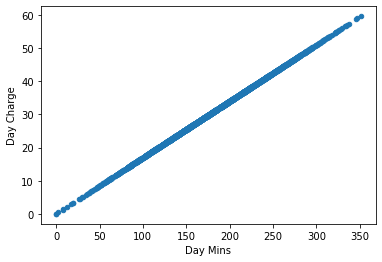

In [4]:
data.plot(kind="scatter", x="Day Mins", y="Day Charge")

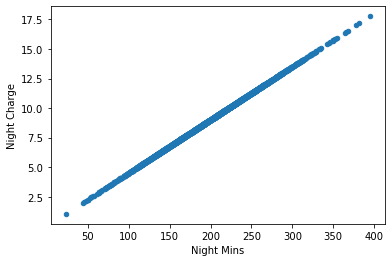

In [5]:
data.plot(kind="scatter", x="Night Mins", y="Night Charge")

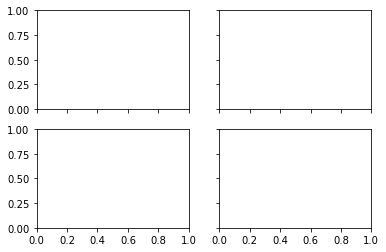

In [15]:
figure, axs = plt.subplots(2,2, sharey=True, sharex=True)

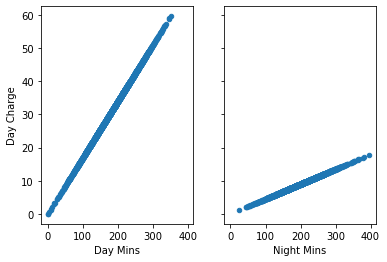

In [16]:
figure, axs = plt.subplots(1,2, sharey=True, sharex=True)
data.plot(kind="scatter", x="Day Mins", y="Day Charge", ax=axs[0])
data.plot(kind="scatter", x="Night Mins", y="Night Charge", ax=axs[1])

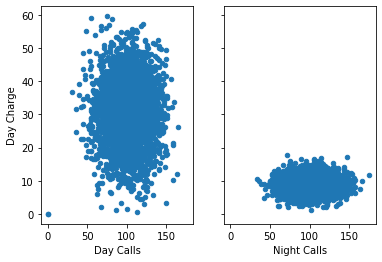

In [17]:
figure, axs = plt.subplots(1,2, sharey=True, sharex=True)
data.plot(kind="scatter", x="Day Calls", y="Day Charge", ax=axs[0])
data.plot(kind="scatter", x="Night Calls", y="Night Charge", ax=axs[1])

# Histograma de frecuencias

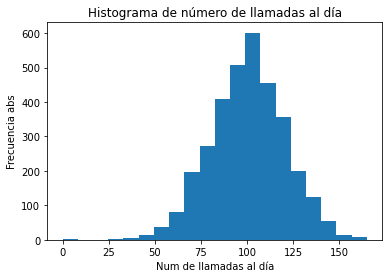

In [21]:
plt.hist(data["Day Calls"], bins=20)
plt.xlabel("Num de llamadas al día")
plt.ylabel("Frecuencia abs")
plt.title("Histograma de número de llamadas al día")
plt.show()

## Regla de Sturges
- Regla práctica acerca del número de clases que deben considerarse al elaborarse un histograma.

$$ c = 1 + \log_2(M) = 1 + \frac{log(M)}{log(2)}$$

Donde $M$ es el tamaño de la muestra.

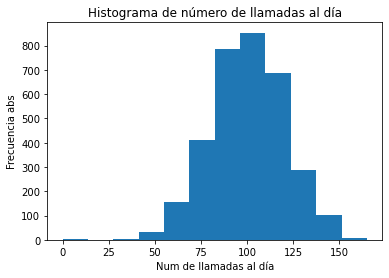

In [24]:
reglaSturges = np.int(1 + np.log2(data.shape[0]))
plt.hist(data["Day Calls"], bins=reglaSturges)
plt.xlabel("Num de llamadas al día")
plt.ylabel("Frecuencia abs")
plt.title("Histograma de número de llamadas al día")
plt.show()

# Boxplot, diagrama de cajas y bigotes

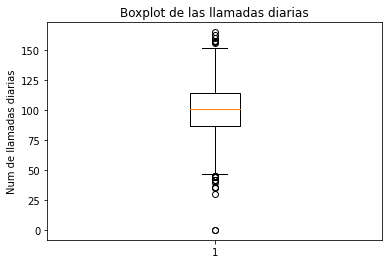

In [25]:
plt.boxplot(data["Day Calls"])
plt.ylabel("Num de llamadas diarias")
plt.title("Boxplot de las llamadas diarias")
plt.show()

In [26]:
data["Day Calls"].describe()

count    3333.000000
mean      100.435644
std        20.069084
min         0.000000
25%        87.000000
50%       101.000000
75%       114.000000
max       165.000000
Name: Day Calls, dtype: float64

## IQR
- Rango interquartílico
$$ IQR = Q_3 - Q_1 $$

In [27]:
IQR = data["Day Calls"].quantile(.75) - data["Day Calls"].quantile(.25)
IQR

27.0

### Bigote inferior

In [29]:
data["Day Calls"].quantile(.25) - IQR * 1.5

46.5

### Bigote superior

In [28]:
data["Day Calls"].quantile(.75) + IQR * 1.5

154.5